# Business Problem: Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries.

## Assumption : 
### 1.	More data means in type of movies mean, actually in past user watched those kind of movies.
### 2.	Assume each season as equal number of episodes. Each episode as same duration


In [83]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and creating netflix data frame

In [85]:
# creating dataframe for Netflix data
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df_original = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

# Exploratory analysis of data frame

In [86]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Insight from below code 
- director, cast, country, date_added contain majority null/ missing values.
- rating and duration contain 3to 4 missing values

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [88]:
# get all column name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [89]:
print('shape of data frame -', df.shape)
print('dimension of data frame - ', df.ndim)
print('size of data frame - ',df.size)
print('type - ',type(df))

shape of data frame - (8807, 12)
dimension of data frame -  2
size of data frame -  105684
type -  <class 'pandas.core.frame.DataFrame'>


# Exploratory analysis of indivilual columns on input dataframe

## Show_id column
### Insight
- Elements in this columns are unique, as is should be and no null value
- datatype is object , which should be string dtype

In [90]:
# show_id column
print('count of elements', df['show_id'].count())
print('unique elements', df['show_id'].unique())
print('number of unique elements', df['show_id'].nunique())



count of elements 8807
unique elements ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
number of unique elements 8807


## Type column
### Insight
- Elements in this columns are of cateogorical type and no null value
- datatype is object,  which should be category dtype
- mode = Movie
- only 2 category data  - Movie and TV show

In [91]:
# type column
print('count of elements', df['type'].count())
print('size of elements', df['type'].size)
print('unique elements', df['type'].unique())
print('number of unique elements', df['type'].nunique())
print()
print('value of count of each element', df['type'].value_counts())
print()
print('mode of column', df['type'].mode())

count of elements 8807
size of elements 8807
unique elements ['Movie' 'TV Show']
number of unique elements 2

value of count of each element Movie      6131
TV Show    2676
Name: type, dtype: int64

mode of column 0    Movie
Name: type, dtype: object


## title column
### Insight
- All elements in this columns are unique and no null value
- datatype is object

In [92]:
print('count of elements', df['title'].count())
print('size of elements', df['title'].size)
print('unique elements', df['title'].unique())
print('number of unique elements', df['title'].nunique())

count of elements 8807
size of elements 8807
unique elements ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
number of unique elements 8807


## Director column     
### Insight
- All elements in this columns are not unique and includes null value
- number of null values - 2634
- datatype is object , which should be string
- Mode -  Rajiv Chilaka (19 movies / tvshows)
- unique value = 4528

In [93]:
print('count of elements', df['director'].count())
print('size of elements', df['director'].size)
print('number of unique elements', df['director'].nunique())
print()
print('mode of column', df['director'].mode())
print()
print('value of count of each element', df['director'].value_counts().reset_index())
print()
print('number of null values', df['director'].isna().sum())

count of elements 6173
size of elements 8807
number of unique elements 4528

mode of column 0    Rajiv Chilaka
Name: director, dtype: object

value of count of each element                                index  director
0                      Rajiv Chilaka        19
1             Raúl Campos, Jan Suter        18
2                       Marcus Raboy        16
3                        Suhas Kadav        16
4                          Jay Karas        14
...                              ...       ...
4523  Raymie Muzquiz, Stu Livingston         1
4524                    Joe Menendez         1
4525                      Eric Bross         1
4526                  Will Eisenberg         1
4527                     Mozez Singh         1

[4528 rows x 2 columns]

number of null values 2634


## Cast column
### Insight
- All elements in this columns are not unique and includes null value
- number of null values - 825
- datatype is object, which should be string
- most of the elements is list of string
- Mode -  David Attenborough  (in 19 movies / tvshows , was casted)

In [94]:
print('count of elements', df['cast'].count())
print('size of elements', df['cast'].size)
print('number of unique elements', df['cast'].nunique())
print()
print('mode of column', df['cast'].mode())
print()
print('value of count of each element', df['cast'].value_counts().reset_index())
print()
print('number of null values', df['cast'].isna().sum())

count of elements 7982
size of elements 8807
number of unique elements 7692

mode of column 0    David Attenborough
Name: cast, dtype: object

value of count of each element                                                   index  cast
0                                    David Attenborough    19
1     Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...    14
2                                           Samuel West    10
3                                           Jeff Dunham     7
4          David Spade, London Hughes, Fortune Feimster     6
...                                                 ...   ...
7687  Michael Peña, Diego Luna, Tenoch Huerta, Joaqu...     1
7688                        Nick Lachey, Vanessa Lachey     1
7689  Takeru Sato, Kasumi Arimura, Haru, Kentaro Sak...     1
7690  Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuk...     1
7691  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...     1

[7692 rows x 2 columns]

number of null values 825


## country column
### Insight
- All elements in this columns are not unique and includes null value
- number of null values - 831
- datatype is object, which should be string
- most of the elements is list of string
- Mode -  United States (2818 value count)
- unique value = 748

In [95]:
print('count of elements', df['country'].count())
print('size of elements', df['country'].size)
print('number of unique elements', df['country'].nunique())
print()
print('mode of column', df['country'].mode())
print()
print('value of count of each element', df['country'].value_counts().reset_index())
print()
print('number of null values', df['country'].isna().sum())

count of elements 7976
size of elements 8807
number of unique elements 748

mode of column 0    United States
Name: country, dtype: object

value of count of each element                                       index  country
0                             United States     2818
1                                     India      972
2                            United Kingdom      419
3                                     Japan      245
4                               South Korea      199
..                                      ...      ...
743              Romania, Bulgaria, Hungary        1
744                      Uruguay, Guatemala        1
745                France, Senegal, Belgium        1
746  Mexico, United States, Spain, Colombia        1
747            United Arab Emirates, Jordan        1

[748 rows x 2 columns]

number of null values 831


## Date_added column
### Insight
- All elements in this columns are not unique and includes null value
- number of null values - 10
- datatype is object, which should be datetime datatype
- Most of the movie added on January 1, 2020  -  189 counts
- most of movies/tvshows added on first of month
- unique value = 1767

In [96]:
print('count of elements', df['date_added'].count())
print('size of elements', df['date_added'].size)
print('number of unique elements', df['date_added'].nunique())
print()
print('mode of column', df['date_added'].mode())
print()
print('value of count of each element', df['date_added'].value_counts().reset_index())
print()
print('number of null values', df['date_added'].isna().sum())

count of elements 8797
size of elements 8807
number of unique elements 1767

mode of column 0    January 1, 2020
Name: date_added, dtype: object

value of count of each element                   index  date_added
0       January 1, 2020         109
1      November 1, 2019          89
2         March 1, 2018          75
3     December 31, 2019          74
4       October 1, 2018          71
...                 ...         ...
1762   December 4, 2016           1
1763  November 21, 2016           1
1764  November 19, 2016           1
1765  November 17, 2016           1
1766   January 11, 2020           1

[1767 rows x 2 columns]

number of null values 10


## release_year column
### Insight
- All elements in this columns are not unique and no null value
- datatype is int64, should be in string or categorical
- Most of the movie released on 2018 -  1147 counts
- unique value = 74
- first release year -  1925
- last release year -  2021
- range of years - 96

In [97]:
print('count of elements', df['release_year'].count())
print('size of elements', df['release_year'].size)
print('number of unique elements', df['release_year'].nunique())
print()
print('mode of column', df['release_year'].mode())
print()
print('value of count of each element', df['release_year'].value_counts().reset_index())
print('first release year', df['release_year'].min())
print('last release year', df['release_year'].max())
print('range of years', df['release_year'].max() - df['release_year'].min())

count of elements 8807
size of elements 8807
number of unique elements 74

mode of column 0    2018
Name: release_year, dtype: int64

value of count of each element     index  release_year
0    2018          1147
1    2017          1032
2    2019          1030
3    2020           953
4    2016           902
..    ...           ...
69   1959             1
70   1925             1
71   1961             1
72   1947             1
73   1966             1

[74 rows x 2 columns]
first release year 1925
last release year 2021
range of years 96


## Rating column
### Insight
- All elements in this columns are not unique and includes null value
- number of null values - 4
- datatype is object, which should be category datatype
- Most of the content are of "TV-MA" rated  -  3207 counts
- unique value = 17

In [98]:
print('count of elements', df['rating'].count())
print('size of elements', df['rating'].size)
print('number of unique elements', df['rating'].nunique())
print()
print('mode of column', df['rating'].mode())
print()
print('value of count of each element', df['rating'].value_counts().reset_index())
print()
print('number of null values', df['rating'].isna().sum())

count of elements 8803
size of elements 8807
number of unique elements 17

mode of column 0    TV-MA
Name: rating, dtype: object

value of count of each element        index  rating
0      TV-MA    3207
1      TV-14    2160
2      TV-PG     863
3          R     799
4      PG-13     490
5      TV-Y7     334
6       TV-Y     307
7         PG     287
8       TV-G     220
9         NR      80
10         G      41
11  TV-Y7-FV       6
12     NC-17       3
13        UR       3
14    74 min       1
15    84 min       1
16    66 min       1

number of null values 4


## Duration column
### Insight
- All elements in this columns are not unique and includes null value
- number of null values - 3
- datatype is object, which should be int (only int values is required for calculation)
- Most of the content of the contents are Tv shows of 1 season  -  1793 counts
- unique value = 220

In [99]:
print('count of elements', df['duration'].count())
print('size of elements', df['duration'].size)
print('number of unique elements', df['duration'].nunique())
print()
print('mode of column', df['duration'].mode())
print()
print('value of count of each element', df['duration'].value_counts().reset_index())
print()
print('number of null values', df['duration'].isna().sum())

count of elements 8804
size of elements 8807
number of unique elements 220

mode of column 0    1 Season
Name: duration, dtype: object

value of count of each element          index  duration
0     1 Season      1793
1    2 Seasons       425
2    3 Seasons       199
3       90 min       152
4       94 min       146
..         ...       ...
215     16 min         1
216    186 min         1
217    193 min         1
218    189 min         1
219    191 min         1

[220 rows x 2 columns]

number of null values 3


## Listed_in column (genre)
### Insight
- All elements in this columns are not unique and no null value
- datatype is object, which should be categorical datatype 
- Most of the content of the contents are from 'Dramas, International Movies' -  362 counts
- unique value = 514
- most of the elements is list of string

In [100]:
print('count of elements', df['listed_in'].count())
print('size of elements', df['listed_in'].size)
print('number of unique elements', df['listed_in'].nunique())
print()
print('mode of column', df['listed_in'].mode())
print()
print('value of count of each element', df['listed_in'].value_counts().reset_index())

count of elements 8807
size of elements 8807
number of unique elements 514

mode of column 0    Dramas, International Movies
Name: listed_in, dtype: object

value of count of each element                                                  index  listed_in
0                         Dramas, International Movies        362
1                                        Documentaries        359
2                                      Stand-Up Comedy        334
3               Comedies, Dramas, International Movies        274
4     Dramas, Independent Movies, International Movies        252
..                                                 ...        ...
509         Kids' TV, TV Action & Adventure, TV Dramas          1
510                  TV Comedies, TV Dramas, TV Horror          1
511   Children & Family Movies, Comedies, LGBTQ Movies          1
512  Kids' TV, Spanish-Language TV Shows, Teen TV S...          1
513                     Cult Movies, Dramas, Thrillers          1

[514 rows x 2 colum

## Description column
### Insight
- All elements in this columns are not unique and no null value
- datatype is object
- Most of the content of the contents are from 'Paranormal activity at a lush, abandoned prope...' -  4 counts
- unique value = 8775
- All elements is list of string

In [101]:
print('count of elements', df['description'].count())
print('size of elements', df['description'].size)
print('number of unique elements', df['description'].nunique())
print()
print('mode of column', df['description'].mode())
print()
print('value of count of each element', df['description'].value_counts().reset_index())

count of elements 8807
size of elements 8807
number of unique elements 8775

mode of column 0    Paranormal activity at a lush, abandoned prope...
Name: description, dtype: object

value of count of each element                                                   index  description
0     Paranormal activity at a lush, abandoned prope...            4
1     Challenged to compose 100 songs before he can ...            3
2     A surly septuagenarian gets another chance at ...            3
3     Multiple women report their husbands as missin...            3
4     Secrets bubble to the surface after a sensual ...            2
...                                                 ...          ...
8770  Sent away to evade an arranged marriage, a 14-...            1
8771  When his partner in crime goes missing, a smal...            1
8772  During 1962’s Cuban missile crisis, a troubled...            1
8773  A teen's discovery of a vintage Polaroid camer...            1
8774  A scrappy but poor boy 

# Convert columns datatype to required datatype

- show_id column datatype to int
- type column datatype to category
- director column datatype to string
- cast column datatype to string
- country column datatype to string
- date_added column datatype to datetime
- duration column datatype to string
- listed_in column datatype to string

In [102]:
# covert show_id column datatype to int
df['show_id'] = df['show_id'].astype(dtype = 'string')

In [103]:
# covert type column datatype to category
df['type'] = df['type'].astype(dtype = 'category')

In [104]:
# covert director column datatype to string
df['director'] = df['director'].astype(dtype = 'string')

In [105]:
# covert cast column datatype to string
df['cast'] = df['cast'].astype(dtype = 'string')

In [106]:
# covert country column datatype to string
df['country'] = df['country'].astype(dtype = 'string')

In [107]:
# covert date_added column datatype to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
#September 25, 2021

In [108]:
# covert release_year column datatype to string
df['release_year'] = df['release_year'].astype(dtype = 'string')

In [109]:
# covert duration column datatype to string
df['duration'] = df['duration'].astype(dtype = 'string')

In [110]:
# covert listed_in column datatype to string
df['listed_in'] = df['listed_in'].astype(dtype = 'string')

# Challenges in data
1. Get integer value from duration column
2. separate list of string in cast, list_in, director, country columns
2. Fixing null values in director(2634), cast(825), country(831), data_added(10), rating(4) and duration columns(4)


## 1. Get integer value from duration column
#### Approach:
 - split duration column based on space as delimiter
 - Explode the output and keep only 1st index value

In [111]:
df['duration'] = df['duration'].str.split(expand = True)[0]

## 2. listed data element converted to single element and data is updated
### Approach:
 - Split column based on ', ' as delimiter
 - Then explode required columns one by one
 - After exploding, changed datatype to required datatype

In [112]:
# spliting multiple string data and converting to list
df['director'] = df['director'].str.split(', ')
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')
df['cast'] = df['cast'].str.split(', ')

In [113]:
# director , country, listed_in and cast column is exploded
# copy of data is created as df1
df1 = df.explode('director')
df1 = df1.explode('country')
df1 = df1.explode('listed_in')
df1 = df1.explode('cast')

In [114]:
# director, country, listed_in, rating and cast column datatype converted to 'String'
df1['director'] = df1['director'].astype(dtype = 'string')
df1['cast'] = df1['cast'].astype(dtype = 'string')
df1['country'] = df1['country'].astype(dtype = 'string')
df1['rating'] = df1['rating'].astype(dtype = 'string')
df1['listed_in'] = df1['listed_in'].astype(dtype = 'string')

## 3. director column Null value filled based on country name
### Approach :
 - Group by data by country and pick director name
 - convert group data to dictionary
 - Then fill null in director w.r.t country name based on dictionary

In [115]:
ctry_grp = df1.groupby('country')['director'].first().reset_index()
ctry_grp = ctry_grp.loc[1:]

In [116]:
ctry_grp  = dict(zip(ctry_grp['country'], ctry_grp ['director']))

In [117]:
df1['director'] = df1['director'].fillna(df1['country'].map(ctry_grp))

# country column null value filled based on director column
### Approach :
 - Group by data by director and pick country name
 - convert group data to dictionary
 - Then fill null in country w.r.t director name based on dictionary

In [118]:
dir_grp = df1.groupby('director')['country'].first().reset_index()

In [119]:
dir_grp  = dict(zip(dir_grp['director'], dir_grp ['country']))

In [120]:
df1['country'] = df1['country'].fillna(df1['director'].map(dir_grp))

# country column null value filled based on listed_in column
### Approach :
 - Group by data by listed_in and pick country name
 - convert group data to dictionary
 - Then fill null in country w.r.t listed_in name based on dictionary

In [121]:
genre_grp = df1.groupby('listed_in')['country'].first().reset_index()
genre_grp  = dict(zip(genre_grp['listed_in'], genre_grp ['country']))

In [122]:
df1['country'] = df1['country'].fillna(df1['listed_in'].map(genre_grp))

# date_added null value filled based on release_year column
### Approach :
 - Group by data by release_year and pick date_added name
 - convert group data to dictionary
 - Then fill null in date_added w.r.t release_year based on dictionary

In [123]:
rel_yr_grp = df1.groupby('release_year')['date_added'].first().reset_index()

In [124]:
rel_yr_grp = dict(zip(rel_yr_grp['release_year'],rel_yr_grp['date_added']))

In [125]:
df1['date_added'] = df1['date_added'].fillna(df1['release_year'].map(rel_yr_grp))

# cast column null value filled based on director column
### Approach :
 - Group by data by director and pick cast name
 - convert group data to dictionary
 - Then fill null in cast w.r.t country name based on dictionary

In [126]:
dir_cst_grp = df1.groupby('director')['cast'].first().reset_index()

In [127]:
dir_cst_grp = dict(zip(dir_cst_grp['director'],dir_cst_grp['cast']))

In [128]:
df1['cast'] = df1['cast'].fillna(df1['director'].map(dir_cst_grp))

# Deleting null values present columns
## 3% of null rows are deleted

In [129]:
df1.dropna(subset = ['director'], inplace = True)

In [130]:
df1.dropna(subset = ['rating'], inplace = True)

In [131]:
df1.dropna(subset = ['duration'], inplace = True)

In [132]:
df1.dropna(subset = ['cast'], inplace = True)

## Creation of day, month, year column for analysis

In [133]:
df1['day_'] = df1['date_added'].dt.day
df1['month_'] = df1['date_added'].dt.month
df1['year_'] = df1['date_added'].dt.year

# Analysis of data

# 1.	How has the number of movies released per year changed over the last
 - Insight : From year 1997, movies/ TV shows are release increased, max of 1000/ year. In 2021, year's second half data is not available in data. After 2018, number of movies release got declined as per data.
 - Recommendation : Growth of digital content will increases in upcoming years due to growth of technology and internet speed. More movies will be released and more user will be attracted with afforable rates / free based plans with Ads.

In [134]:
plot1 = df1.groupby('show_id')['release_year'].first().reset_index().sort_values('release_year')

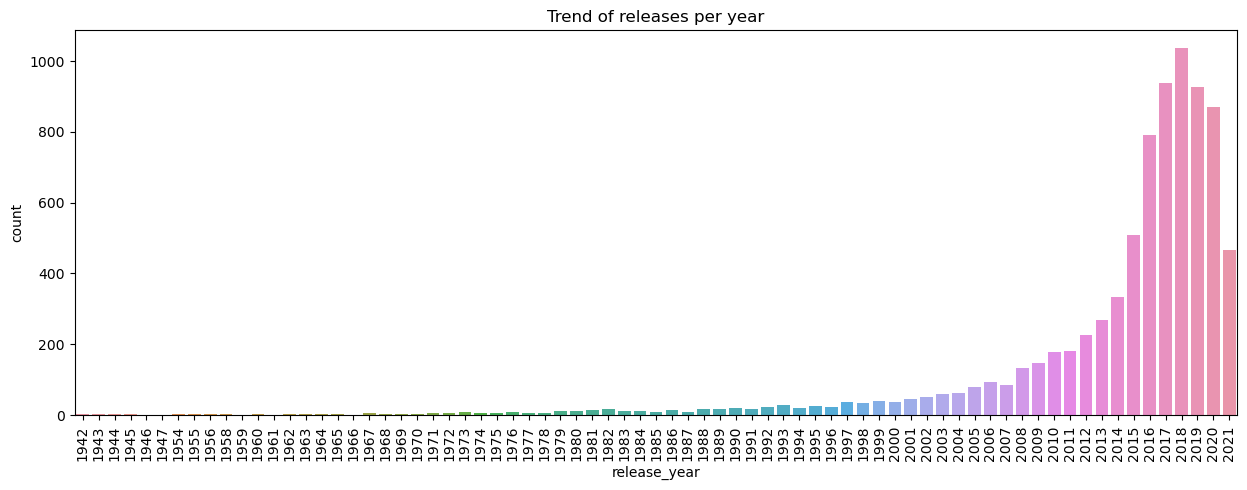

In [348]:
plt.figure(figsize = (15,5))
sns.countplot(data = plot1, x = 'release_year')
plt.title('Trend of releases per year')
plt.xticks(size = 10,rotation = 90)
plt.show()

# 2.	Comparison of tv shows vs. movies
 - Insight : count of movies are almost double when compared to TV shows 
 - Recommendation : More movies to be added, as past data shows more movies are available. By assumption - more movies means more user like to watch movies. Movies can be produced / added based on the cost.

In [136]:
plot2 = df1.groupby('show_id')['type'].first().reset_index()

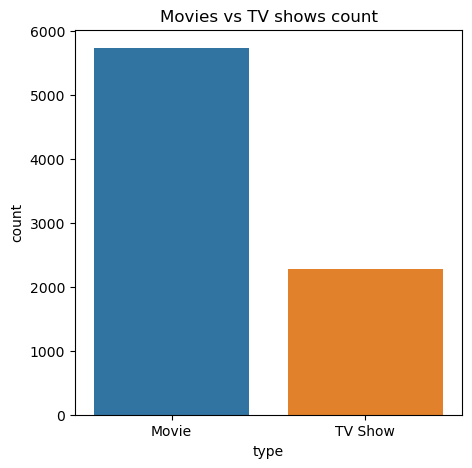

In [137]:
plt.figure(figsize = (5,5))
sns.countplot(data = plot2, x = 'type')
plt.title('Movies vs TV shows count')
plt.xticks(size = 10)
plt.show()

# 3.	What is the best time to launch a TV show? (added date analysis)
 - Insight :  
     - Most of movies/ Tv shows are added on 1st/ 15th of every month.
     - Even compared to month wise, most of them added on Decemeber month
     - Addition of movies/ Tv show increase over the year.
 - Recommendation : 
     - As Movies/ Tv shows can be added on 1st / 15th of every month and preferablely on Dec, Sep, july.
     - Assume - those month contains vacation time.

In [138]:
plot3 = df1.groupby('show_id')[['type','day_','month_', 'year_','date_added']].first().reset_index()

In [139]:
plot3 = plot3[plot3['type'] == 'TV Show']

<Axes: xlabel='day_', ylabel='count'>

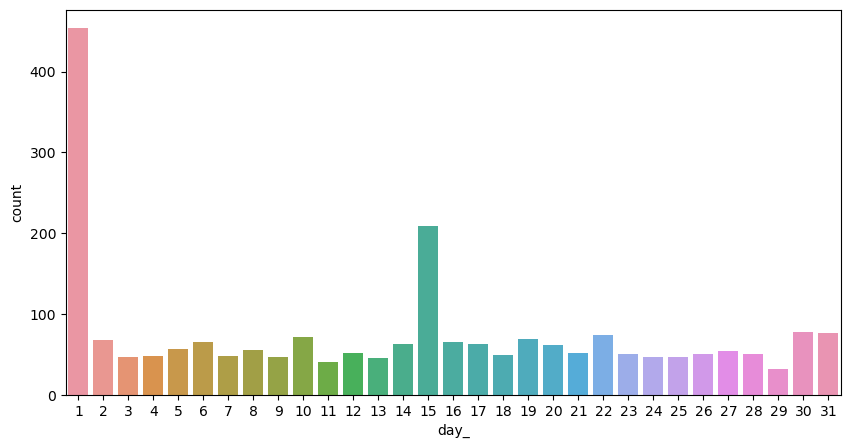

In [140]:
plt.figure(figsize = (10,5))
sns.countplot(data = plot3, x = 'day_')

<Axes: xlabel='month_', ylabel='count'>

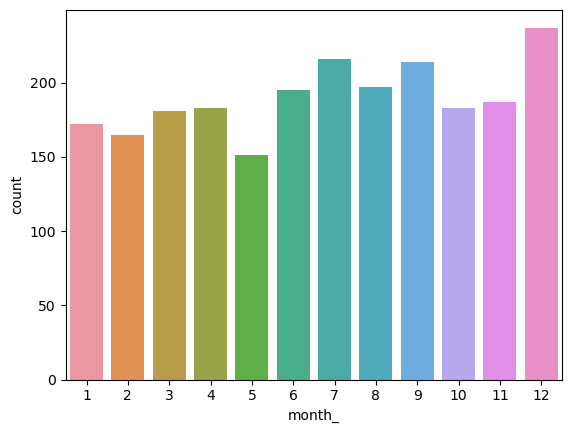

In [141]:
sns.countplot(data = plot3, x = 'month_')

<Axes: xlabel='year_', ylabel='count'>

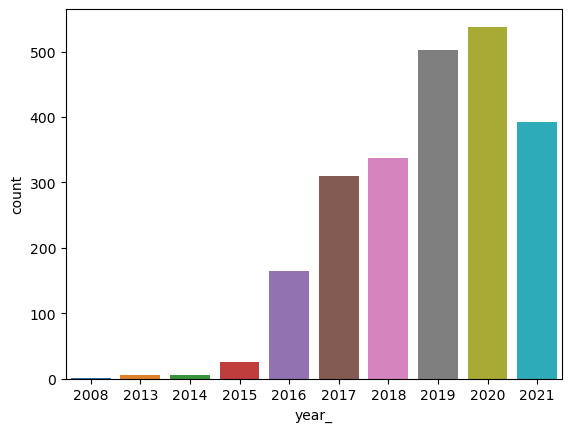

In [156]:
sns.countplot(data = plot3, x = 'year_')

## 4.	Analysis of actors/directors of different types of shows/movies.
 - Insight : Refer below table for details - 
     - In movies / Tv Show : Top 10 cast have acted in majority movies 
     - In movies / Tv Show : Top director have directed in majority movies
 - Recommendation :
     - As per data, with a combination of Top 10 director and Top 10 Cast in new movie/Tv show. Those movie / Tv shows can be added to Netflix.
     - As  these combination as worked in past and will work in future also.
     

In [142]:
df_actors = df.explode('cast')
df_actors['cast'] = df_actors['cast'].astype('string')

In [143]:
df_actors_m = df_actors[df_actors['type'] == 'Movie'][['cast','type']]
df_actors_tv = df_actors[df_actors['type'] == 'TV Show'][['cast','type']]

In [144]:
df_actors_m['cast'].value_counts().reset_index()

,index,cast
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Akshay Kumar,30
4,Om Puri,30
...,...,...
25946,Wiwat Kongrasri,1
25947,Evelyne Grandjean,1
25948,Sayali Bhagat,1
25949,Manasa Radhakrishnan,1


In [145]:
df_actors_tv['cast'].value_counts().reset_index()

,index,cast
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
...,...,...
14858,Dennis Chew,1
14859,Cavin Soh,1
14860,Mandy Patinkin,1
14861,Joe Mantegna,1


In [146]:
df_direc = df.explode('director')
df_direc['director'] = df_direc['director'].astype('string')

In [147]:
df_direc_m = df_direc[df_direc['type'] == 'Movie'][['director','type']]
df_direc_tv = df_direc[df_direc['type'] == 'TV Show'][['director','type']]

In [148]:
df_direc_m['director'].value_counts().reset_index()

,index,director
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,15
...,...,...
4772,Joe Boyd,1
4773,David Gelb,1
4774,Radhu Karmakar,1
4775,John Edginton,1


In [149]:
df_direc_tv['director'].value_counts().reset_index()

,index,director
0,Alastair Fothergill,3
1,Ken Burns,3
2,Stan Lathan,2
3,Rob Seidenglanz,2
4,Shin Won-ho,2
...,...,...
294,Dheeraj Berry,1
295,Estela Renner,1
296,Bumpy,1
297,Michael Samuels,1


## 5.	Does Netflix has more focus on TV Shows than movies in recent years
 - Insight : 
     - There is decline in movies addition in Netflix over years. 
     - In past year, TV shows addition as been increased year by year

 - recommendation : 
     - As per past data, Netflix as been more TV shows compared to movies. Where viewer, prefer to watch TV show  when compared to movies.
     - TV shows to be added more and produced more to get what viewer want to watch.
     - Special plan can be added, for viewer who wants to watch only TV shows and this plan is only TV show watch.

In [151]:
plot4 = df1.groupby('show_id')[['type','year_']].first().sort_values('year_')

<Axes: xlabel='year_', ylabel='count'>

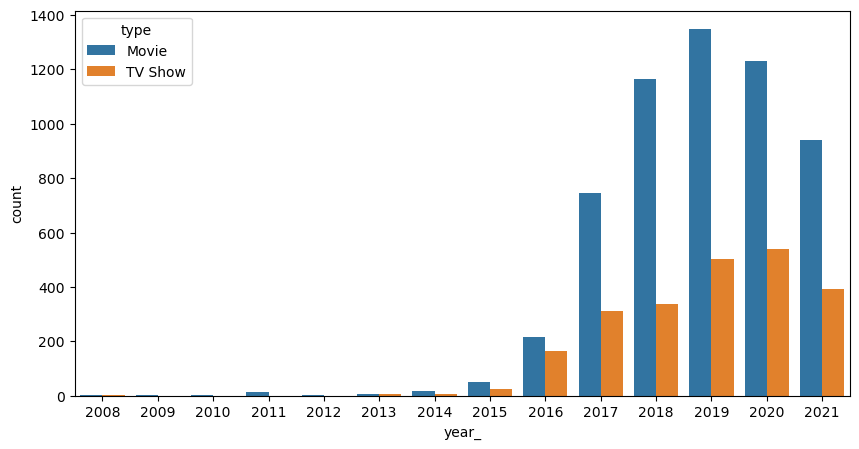

In [158]:
plt.figure(figsize = (10,5))
sns.countplot(data = plot4, x = 'year_', hue = 'type')

## 6.	Understanding what content is available in different countries.
 - Insights:
     - Most of Movies/ Tv show which are diversed are released in Top 10 - 20 countries.
     - USA tops the list with all different of contents are viewed by viewers.
     - By count of Genre, more movies with different content are released in USA
 - Recommendation : 
     - In Top 5 countries based of diversed content, New content type Movies/ Tv shows can be added specific to those countires. As viewer can watch any new content.
     - In USA, more movies and TV shows can be added. past data shows - viewers can watch any new type contents.

In [220]:
plot5 = df.explode('country')
plot5 = plot5.explode('listed_in')

In [221]:
plot5_1 = pd.crosstab(index = plot5['country'], columns = plot5['listed_in'])

In [222]:
plot5_1.replace(0,np.nan, inplace = True)
plot5_1['cnt'] = plot5_1.count(axis = 1)
plot5_1.sort_values('cnt', ascending = False, inplace = True)
plot5_1['total'] = plot5_1.sum(axis = 1)
plot5_1 = plot5_1.reset_index()

In [235]:
plot5['listed_in'].nunique()

42

In [226]:
# top 5 countries with most of content
plot5_1.head()[['country', 'total', 'cnt']]

listed_in,country,total,cnt
0,United States,6821.0,42
1,Canada,914.0,37
2,United Kingdom,1816.0,37
3,Australia,375.0,36
4,India,2839.0,35


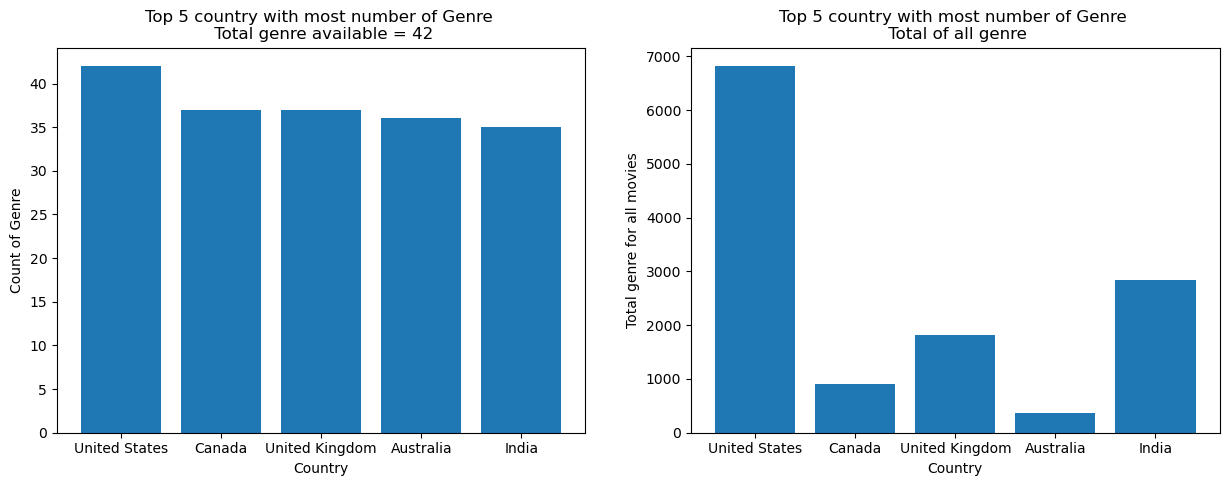

In [257]:
plt.figure(figsize = (15,5))
#1
plt.subplot(1,2,1)
plt.bar(data= plot5_1.head(), x = 'country', height = 'cnt')
plt.xlabel('Country')
plt.ylabel('Count of Genre')
plt.title('Top 5 country with most number of Genre \n Total genre available = 42')


#2 
plt.subplot(1,2,2)
plt.bar(data= plot5_1.head(), x = 'country', height = 'total')
plt.xlabel('Country')
plt.ylabel('Total genre for all movies')
plt.title('Top 5 country with most number of Genre \n Total of all genre')
plt.show()

## 7.	Genre wise count
 - Insight : Based on plot, Top 10 Genre are the one which are most watched by viewers. As a per past data, So those Genre contents are more.
 - Recommendataion : As viewer pefer to watch Movies / Tv shows based on top 10 Genre. So Netflix can add/produce movies/Shows in those Genre to attract more viewer

In [258]:
plot6 = df.explode('listed_in')

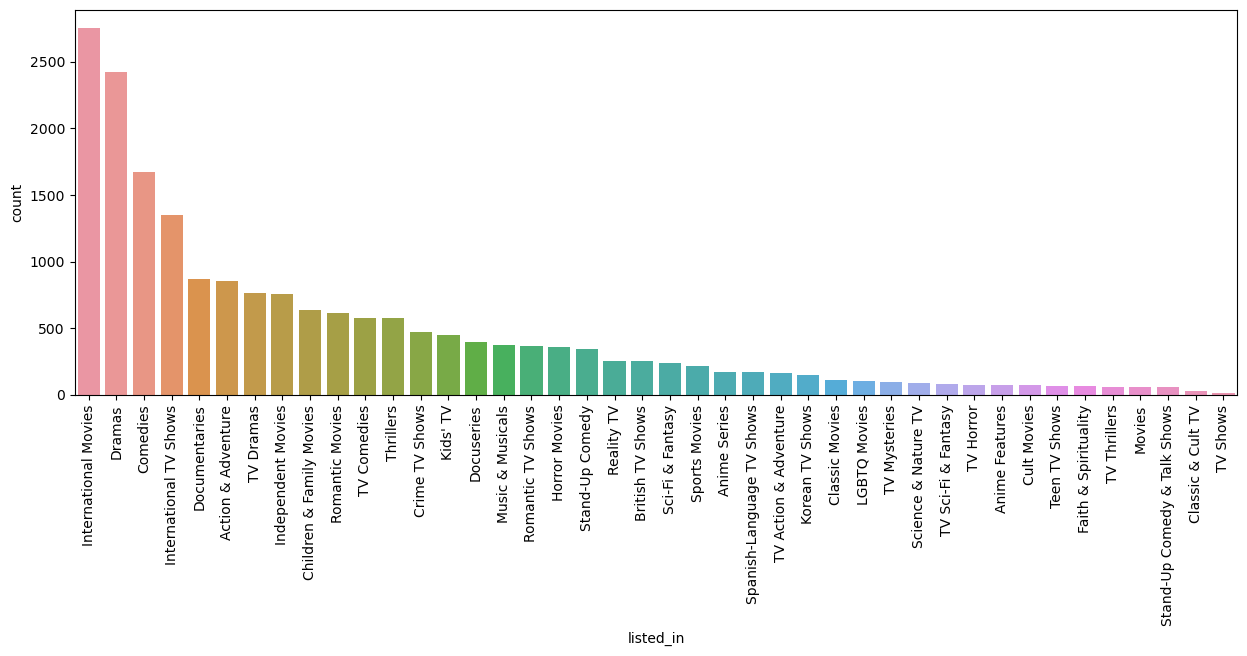

In [271]:
plt.figure(figsize = (15,5))
sns.countplot(data = plot6, x = 'listed_in', order = plot6['listed_in'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Genre wise count w.r.t Type 
 - Insight : Based on below plot, Most of Genre (top10) are from movies type. Few are from TV show.
 - Recommendation : New movies/Tv show which to be added from Top 10 Genre. These specific Genre can be recommended to viewer as most of them tend to watch.

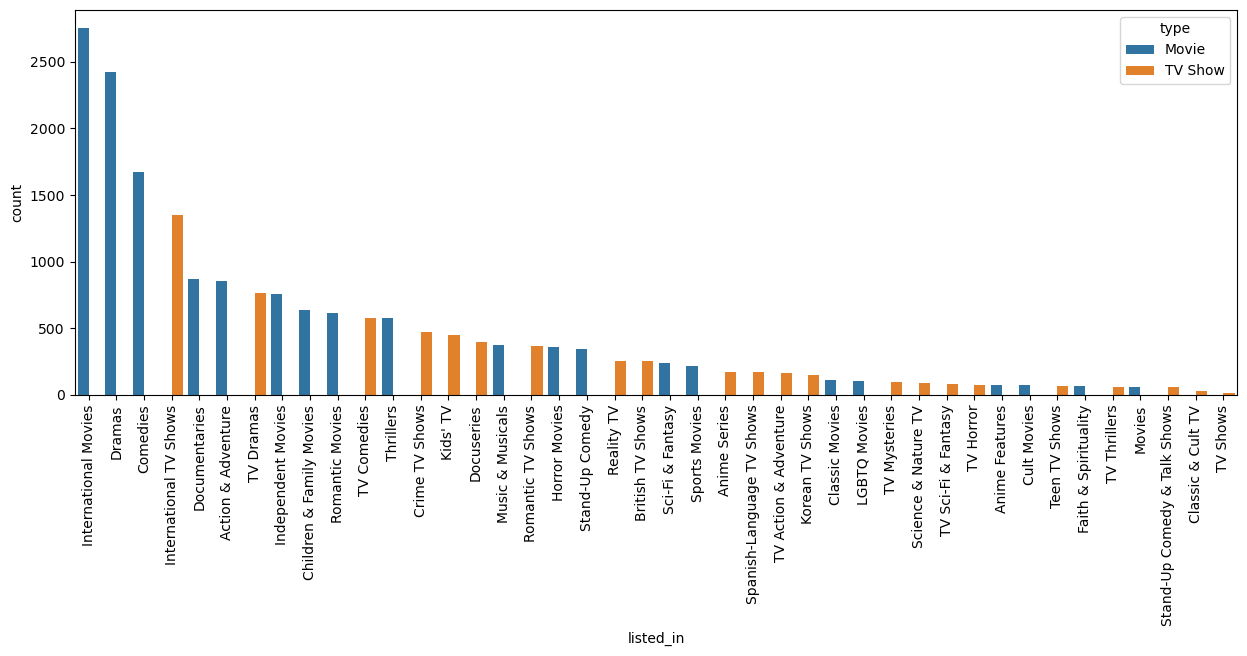

In [323]:
plt.figure(figsize = (15,5))
sns.countplot(data = plot6, x = 'listed_in', order = plot6['listed_in'].value_counts().index, hue = 'type')
plt.xticks(rotation = 90)
plt.show()

## 8. Analysis of duration for movies
 - Insights:
     - Most of movies are of 80 - 110 mins.
 - Recommendation : Any movies which are to be added. need to be in 80 - 120min range. As past data show, most of data out of it. So viewer perfer to watch those duration movies

In [288]:
df.dropna(subset = 'duration', inplace = True)
df['duration'] = df['duration'].astype(dtype = 'int64')
plot7 = df[df['type'] == 'Movie']

<Axes: xlabel='duration', ylabel='Count'>

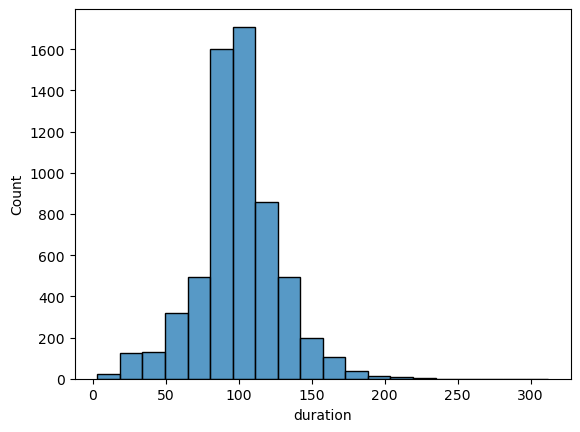

In [291]:
sns.histplot(data = plot7, x = 'duration', bins = 20)

## 9. Analysis of season of Tv shows
 - Insights:
     - Most of Tv shows are of 1 season.
 - Recommendation : Any Tv show which are to be added. need to be in 1 or 2 season. As past data show, most of TV shows data out of it. So viewer perfer to watch those with 1 or 2 seasons.

In [292]:
plot8 = df[df['type'] == 'TV Show']

<Axes: xlabel='duration', ylabel='Count'>

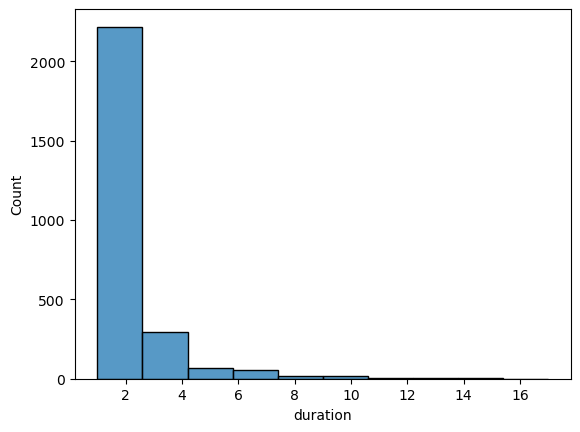

In [294]:
sns.histplot(data = plot8, x = 'duration', bins = 10)

## 10. country wise movies and tv shows
 - Insights:
     - From topmost country by count,  movies are more watched compared to TV shows.
     - But as per past few years, TV shows are more watched.
 - Recommendation : 
     - 1st perference will be for Movies and then TV show for upcoming content addition to Netflix. 
     - In top most country,  preferable to add / produce Movies and TV shows.
     

In [296]:
plot9 = df.explode('country')

In [305]:
plot9_1 = plot9.groupby('country')['type'].count().reset_index().sort_values('type', ascending = False).rename(columns = {'type': 'count'})

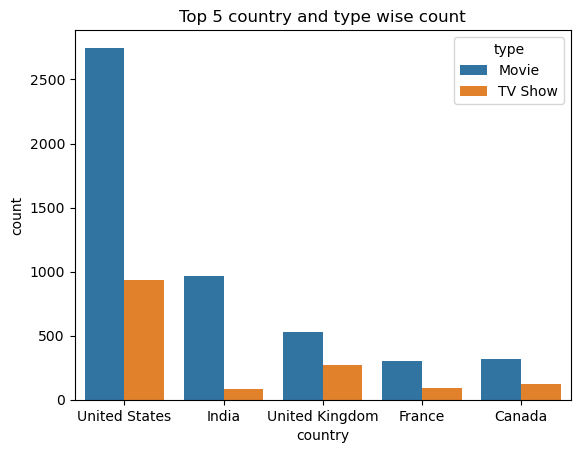

In [335]:
lst_ctry_type = list(plot9_1.head()['country'])
plot9 = plot9.query('country == @lst_ctry_type')

#plot
sns.countplot(data = plot9, x = 'country', hue = 'type')
plt.title('Top 5 country and type wise count')

## 11.  Rating wise count
 - Insights:
     - Most of rated which are available in Netflix are of TV-MA and TV-14.
     - Next rated will be TV-PG and TV-17
 - Recommendation : 
     - Any movies / Tv show which are to be added should be of TV-MA, TV-14 , TV-PG and TV-17. As past data show, most of data out of it. So viewer perfer to watch those rated contents

Text(0.5, 1.0, 'Rating wise count')

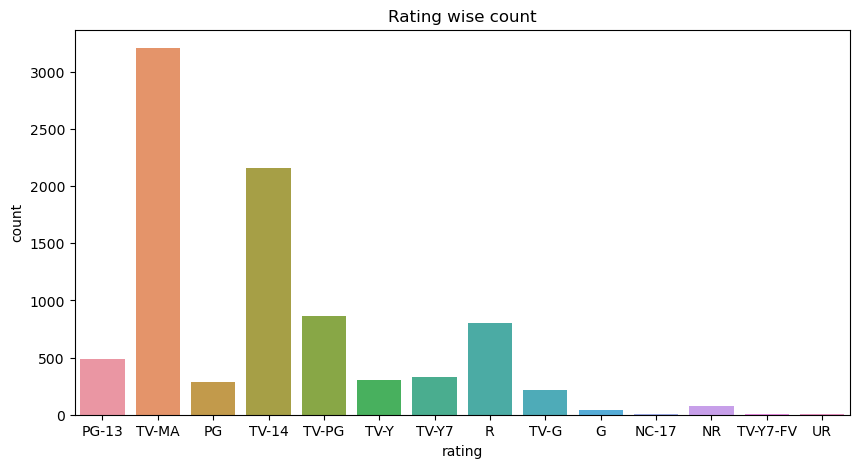

In [346]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'rating')
plt.title('Rating wise count')

## Correlation between columns
 - Insight : As majority of columns are with String/ object datatype. So, only day, month, year correlation are available (those are int datatype). but these are created column for analysis purpose only.
  - In Corr(), all method are tried (‘pearson’, ‘kendall’, ‘spearman’), still result is same.

In [342]:
df1.corr(method='pearson')

C:\Users\trtej\AppData\Local\Temp\ipykernel_17872\805735544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr(method='pearson')


,day_,month_,year_
day_,1.000000,0.021978,0.026132
month_,0.021978,1.000000,-0.166612
year_,0.026132,-0.166612,1.000000
